In [1]:
import keras
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [2]:
lin_reg = keras.Sequential([
    keras.layers.Dense(1,activation='linear', input_shape = [1]),
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

lin_reg.compile(
    loss='mse',
    optimizer=optimizer,
    metrics=['mse']
)

In [8]:
data = np.array([
  [4,2],
  [4,10],
  [7,4],
  [7,22],
  [8,16],
  [9,10],
  [10,18],
  [10,26],
  [10,34],
  [11,17],
  [11,28],
  [12,14],
  [12,20],
  [12,24],
  [12,28],
  [13,26],
  [13,34],
  [13,34],
  [13,46],
  [14,26],
  [14,36],
  [14,60],
  [14,80],
  [15,20],
  [15,26],
  [15,54],
  [16,32],
  [16,40],
  [17,32],
  [17,40],
  [17,50],
  [18,42],
  [18,56],
  [18,76],
  [18,84],
  [19,36],
  [19,46],
  [19,68],
  [20,32],
  [20,48],
  [20,52],
  [20,56],
  [20,64],
  [22,66],
  [23,54],
  [24,70],
  [24,92],
  [24,93],
  [24,120],
  [25,85]
])

In [10]:
speed = data[:,0]
distance = data[:,1]

In [11]:
history = lin_reg.fit(
    x=speed,
    y = distance,
    shuffle=True,
    epochs=1000,
    validation_split=0.2,
    verbose=0
)

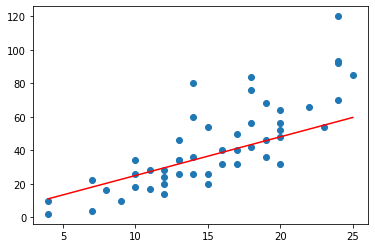

In [16]:
import matplotlib.pyplot as plt

pred_distance = lin_reg.predict(speed)

plt.plot(speed,pred_distance, color='red') 
plt.scatter(speed,distance)
plt.show()